# Spotify recommandation

From statistics about liked and disliked songs , we're going to create a model to predict wether I like a song or not

Summary :

1. Data Collection
2. Data Features
3. Data Cleaning
4. Exploratory Data analysis
5. Modelling
6. Testing on new data

## 1. Data Collection

### 1.1 Playlist creation
I collected 100 liked songs and 95 disliked songs

For those I like , I made a [playlist](https://open.spotify.com/playlist/2WONKi3eZaR29QaQCRSiAE?si=a2463f1d382f4399) of my favorite 100 songs. It is mainly French Rap , sometimes American rap , rock or electro music.

For those I dislike , I collected songs from various kind of music so the model will have a broader view of what I don't like

There is :
- [25 metal songs ( Cannibal Corps )](https://open.spotify.com/playlist/37i9dQZF1DZ06evO0grpKg?si=3c829a46465d4367)
- [20 " I don't like " rap songs ( PNL )](https://open.spotify.com/playlist/37i9dQZF1DX2fxPY4lXxv8?si=c69f40a2a2014a25)
- [25 classical songs](https://open.spotify.com/playlist/1h0CEZCm6IbFTbxThn6Xcs?si=933db0752a684db0)
- [25 Disco songs](https://open.spotify.com/playlist/2rkU3Aop33atDJoF8LCCjh?si=5e1247ee29284f0a)

I didn't include any Pop song because I'm kinda neutral about it

### 1.2 Getting the ID's

1. From the [Spotify's API "Get a playlist's Items"](https://developer.spotify.com/console/get-playlist-tracks/) , I turned the playlists into json formatted data which cointains the ID and the name of each track ( ids/yes.py and ids/no.py ). NB : on the website , specify "items(track(id,name))" in the fields format , to avoid being overwhelmed by useless data.

2. With a script ( ids/ids_to_data.py ) , I turned the json data into a long string with each ID separated with a comma.

### 1.3 Getting the statistics

Now I just had to enter the strings into the [Spotify API "Get Audio Features from several tracks"](https://developer.spotify.com/console/get-audio-features-several-tracks/) and get my data files ( data/good.json and data/dislike.json )

## 2. Data features

From [Spotify's API documentation](https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject) :

* **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **duration_ms** : The duration of the track in milliseconds.
* **energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **instrumentalness** : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **key** : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* **liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness** : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* **mode** : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **time_signature** : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


And the variable that has to be predicted :

* **liked** : 1 for liked songs , 0 for disliked songs

## 3. Data Cleaning

We're going to :
* Take each json files 
* Turn them into a dataframe
* Add a "Liked" column
* Drop useless columns
* Shuffle them ( it's somewhat better for learning )
* Save it as a csv file

### Load Data

In [1]:
import pandas as pd 
import numpy as np
import json

In [2]:
with open("data/good.json","r") as f:
    liked = json.load(f)
liked = pd.DataFrame(liked["audio_features"])
liked

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.749,0.839,6,-4.847,1,0.2970,0.0867,0.000000,0.2040,0.804,172.068,audio_features,55mcupbf7cIsuCEVAuTJVk,spotify:track:55mcupbf7cIsuCEVAuTJVk,https://api.spotify.com/v1/tracks/55mcupbf7cIs...,https://api.spotify.com/v1/audio-analysis/55mc...,111000,4
1,0.573,0.581,10,-9.026,0,0.3390,0.7530,0.000001,0.1300,0.351,76.506,audio_features,57RtLWT7IpugV0yi5bsxJk,spotify:track:57RtLWT7IpugV0yi5bsxJk,https://api.spotify.com/v1/tracks/57RtLWT7Ipug...,https://api.spotify.com/v1/audio-analysis/57Rt...,169347,4
2,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,audio_features,5VyfAfp2Yt3qaeuvq55ll3,spotify:track:5VyfAfp2Yt3qaeuvq55ll3,https://api.spotify.com/v1/tracks/5VyfAfp2Yt3q...,https://api.spotify.com/v1/audio-analysis/5Vyf...,230854,4
3,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,audio_features,3eWHY75nDgte70hh5yf4UW,spotify:track:3eWHY75nDgte70hh5yf4UW,https://api.spotify.com/v1/tracks/3eWHY75nDgte...,https://api.spotify.com/v1/audio-analysis/3eWH...,224029,4
4,0.797,0.852,8,-5.202,1,0.2410,0.0555,0.000024,0.0536,0.480,136.035,audio_features,2UwrB6Ge6mPfUV8yGvAfX7,spotify:track:2UwrB6Ge6mPfUV8yGvAfX7,https://api.spotify.com/v1/tracks/2UwrB6Ge6mPf...,https://api.spotify.com/v1/audio-analysis/2Uwr...,102353,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.616,0.534,10,-10.264,0,0.4830,0.6390,0.000000,0.0844,0.556,170.054,audio_features,3dl4lXWlOxnGo94OqNtpdq,spotify:track:3dl4lXWlOxnGo94OqNtpdq,https://api.spotify.com/v1/tracks/3dl4lXWlOxnG...,https://api.spotify.com/v1/audio-analysis/3dl4...,146480,4
96,0.802,0.549,5,-8.600,0,0.0631,0.2680,0.004960,0.0984,0.498,138.984,audio_features,3DWDcsDoXRIFynCREIkibM,spotify:track:3DWDcsDoXRIFynCREIkibM,https://api.spotify.com/v1/tracks/3DWDcsDoXRIF...,https://api.spotify.com/v1/audio-analysis/3DWD...,184627,4
97,0.767,0.659,7,-4.541,1,0.0387,0.7850,0.000000,0.1120,0.631,90.056,audio_features,6fmtZEUoGwxPNvUgr0NJm1,spotify:track:6fmtZEUoGwxPNvUgr0NJm1,https://api.spotify.com/v1/tracks/6fmtZEUoGwxP...,https://api.spotify.com/v1/audio-analysis/6fmt...,186720,4
98,0.752,0.468,0,-9.966,1,0.3330,0.8050,0.000000,0.1360,0.716,82.795,audio_features,2edc1m7WXxdBA61WlxSInp,spotify:track:2edc1m7WXxdBA61WlxSInp,https://api.spotify.com/v1/tracks/2edc1m7WXxdB...,https://api.spotify.com/v1/audio-analysis/2edc...,179253,4


In [3]:
with open("data/dislike.json","r") as f:
    disliked = json.load(f)
disliked = pd.DataFrame(disliked["audio_features"])
disliked

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.357,0.980,6,-6.835,1,0.0790,0.000052,0.843000,0.0768,0.368,96.969,audio_features,4pFC6tuWErxbO61oFFq3BQ,spotify:track:4pFC6tuWErxbO61oFFq3BQ,https://api.spotify.com/v1/tracks/4pFC6tuWErxb...,https://api.spotify.com/v1/audio-analysis/4pFC...,242760,4
1,0.446,0.977,10,-5.036,0,0.0781,0.000535,0.472000,0.1050,0.339,172.059,audio_features,6V3SNkvi4BnfmZU0j7s9TQ,spotify:track:6V3SNkvi4BnfmZU0j7s9TQ,https://api.spotify.com/v1/tracks/6V3SNkvi4Bnf...,https://api.spotify.com/v1/audio-analysis/6V3S...,284400,4
2,0.291,0.980,1,-5.138,1,0.1530,0.001270,0.091000,0.1020,0.257,79.792,audio_features,1Ds58cpyJzL0YTKk02vh1C,spotify:track:1Ds58cpyJzL0YTKk02vh1C,https://api.spotify.com/v1/tracks/1Ds58cpyJzL0...,https://api.spotify.com/v1/audio-analysis/1Ds5...,270920,4
3,0.462,0.974,1,-5.820,1,0.0816,0.000029,0.723000,0.0751,0.399,107.877,audio_features,77QKNMGwlnzxsTZPYfByMu,spotify:track:77QKNMGwlnzxsTZPYfByMu,https://api.spotify.com/v1/tracks/77QKNMGwlnzx...,https://api.spotify.com/v1/audio-analysis/77QK...,186576,3
4,0.338,0.988,8,-7.290,0,0.0865,0.000083,0.833000,0.0377,0.449,99.046,audio_features,3bQoMbPYOvvseHaSOWAQ3Q,spotify:track:3bQoMbPYOvvseHaSOWAQ3Q,https://api.spotify.com/v1/tracks/3bQoMbPYOvvs...,https://api.spotify.com/v1/audio-analysis/3bQo...,221960,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.798,0.746,10,-8.639,1,0.0313,0.030400,0.361000,0.0703,0.965,128.553,audio_features,1QqsAlhs7pxcXs9BMB1Nv5,spotify:track:1QqsAlhs7pxcXs9BMB1Nv5,https://api.spotify.com/v1/tracks/1QqsAlhs7pxc...,https://api.spotify.com/v1/audio-analysis/1Qqs...,655213,4
91,0.651,0.811,10,-13.870,1,0.0318,0.064800,0.029300,0.1000,0.962,112.126,audio_features,6VuIKS2Z27jCutIapgCUZF,spotify:track:6VuIKS2Z27jCutIapgCUZF,https://api.spotify.com/v1/tracks/6VuIKS2Z27jC...,https://api.spotify.com/v1/audio-analysis/6VuI...,186573,4
92,0.705,0.847,6,-2.588,1,0.0361,0.414000,0.000003,0.4060,0.743,120.527,audio_features,7sMGwiS4vOMcz86ZY3vKYM,spotify:track:7sMGwiS4vOMcz86ZY3vKYM,https://api.spotify.com/v1/tracks/7sMGwiS4vOMc...,https://api.spotify.com/v1/audio-analysis/7sMG...,228120,4
93,0.819,0.811,6,-7.760,0,0.0349,0.203000,0.005580,0.1390,0.766,106.684,audio_features,4JsQkSOE4taeyhH3pv1een,spotify:track:4JsQkSOE4taeyhH3pv1een,https://api.spotify.com/v1/tracks/4JsQkSOE4tae...,https://api.spotify.com/v1/audio-analysis/4JsQ...,246760,4


### Add the "Liked" column

In [4]:
liked["liked"] = [1] * 100
disliked["liked"] = [0] * 95

In [5]:
liked

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked
0,0.749,0.839,6,-4.847,1,0.2970,0.0867,0.000000,0.2040,0.804,172.068,audio_features,55mcupbf7cIsuCEVAuTJVk,spotify:track:55mcupbf7cIsuCEVAuTJVk,https://api.spotify.com/v1/tracks/55mcupbf7cIs...,https://api.spotify.com/v1/audio-analysis/55mc...,111000,4,1
1,0.573,0.581,10,-9.026,0,0.3390,0.7530,0.000001,0.1300,0.351,76.506,audio_features,57RtLWT7IpugV0yi5bsxJk,spotify:track:57RtLWT7IpugV0yi5bsxJk,https://api.spotify.com/v1/tracks/57RtLWT7Ipug...,https://api.spotify.com/v1/audio-analysis/57Rt...,169347,4,1
2,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,audio_features,5VyfAfp2Yt3qaeuvq55ll3,spotify:track:5VyfAfp2Yt3qaeuvq55ll3,https://api.spotify.com/v1/tracks/5VyfAfp2Yt3q...,https://api.spotify.com/v1/audio-analysis/5Vyf...,230854,4,1
3,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,audio_features,3eWHY75nDgte70hh5yf4UW,spotify:track:3eWHY75nDgte70hh5yf4UW,https://api.spotify.com/v1/tracks/3eWHY75nDgte...,https://api.spotify.com/v1/audio-analysis/3eWH...,224029,4,1
4,0.797,0.852,8,-5.202,1,0.2410,0.0555,0.000024,0.0536,0.480,136.035,audio_features,2UwrB6Ge6mPfUV8yGvAfX7,spotify:track:2UwrB6Ge6mPfUV8yGvAfX7,https://api.spotify.com/v1/tracks/2UwrB6Ge6mPf...,https://api.spotify.com/v1/audio-analysis/2Uwr...,102353,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.616,0.534,10,-10.264,0,0.4830,0.6390,0.000000,0.0844,0.556,170.054,audio_features,3dl4lXWlOxnGo94OqNtpdq,spotify:track:3dl4lXWlOxnGo94OqNtpdq,https://api.spotify.com/v1/tracks/3dl4lXWlOxnG...,https://api.spotify.com/v1/audio-analysis/3dl4...,146480,4,1
96,0.802,0.549,5,-8.600,0,0.0631,0.2680,0.004960,0.0984,0.498,138.984,audio_features,3DWDcsDoXRIFynCREIkibM,spotify:track:3DWDcsDoXRIFynCREIkibM,https://api.spotify.com/v1/tracks/3DWDcsDoXRIF...,https://api.spotify.com/v1/audio-analysis/3DWD...,184627,4,1
97,0.767,0.659,7,-4.541,1,0.0387,0.7850,0.000000,0.1120,0.631,90.056,audio_features,6fmtZEUoGwxPNvUgr0NJm1,spotify:track:6fmtZEUoGwxPNvUgr0NJm1,https://api.spotify.com/v1/tracks/6fmtZEUoGwxP...,https://api.spotify.com/v1/audio-analysis/6fmt...,186720,4,1
98,0.752,0.468,0,-9.966,1,0.3330,0.8050,0.000000,0.1360,0.716,82.795,audio_features,2edc1m7WXxdBA61WlxSInp,spotify:track:2edc1m7WXxdBA61WlxSInp,https://api.spotify.com/v1/tracks/2edc1m7WXxdB...,https://api.spotify.com/v1/audio-analysis/2edc...,179253,4,1


In [6]:
disliked

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked
0,0.357,0.980,6,-6.835,1,0.0790,0.000052,0.843000,0.0768,0.368,96.969,audio_features,4pFC6tuWErxbO61oFFq3BQ,spotify:track:4pFC6tuWErxbO61oFFq3BQ,https://api.spotify.com/v1/tracks/4pFC6tuWErxb...,https://api.spotify.com/v1/audio-analysis/4pFC...,242760,4,0
1,0.446,0.977,10,-5.036,0,0.0781,0.000535,0.472000,0.1050,0.339,172.059,audio_features,6V3SNkvi4BnfmZU0j7s9TQ,spotify:track:6V3SNkvi4BnfmZU0j7s9TQ,https://api.spotify.com/v1/tracks/6V3SNkvi4Bnf...,https://api.spotify.com/v1/audio-analysis/6V3S...,284400,4,0
2,0.291,0.980,1,-5.138,1,0.1530,0.001270,0.091000,0.1020,0.257,79.792,audio_features,1Ds58cpyJzL0YTKk02vh1C,spotify:track:1Ds58cpyJzL0YTKk02vh1C,https://api.spotify.com/v1/tracks/1Ds58cpyJzL0...,https://api.spotify.com/v1/audio-analysis/1Ds5...,270920,4,0
3,0.462,0.974,1,-5.820,1,0.0816,0.000029,0.723000,0.0751,0.399,107.877,audio_features,77QKNMGwlnzxsTZPYfByMu,spotify:track:77QKNMGwlnzxsTZPYfByMu,https://api.spotify.com/v1/tracks/77QKNMGwlnzx...,https://api.spotify.com/v1/audio-analysis/77QK...,186576,3,0
4,0.338,0.988,8,-7.290,0,0.0865,0.000083,0.833000,0.0377,0.449,99.046,audio_features,3bQoMbPYOvvseHaSOWAQ3Q,spotify:track:3bQoMbPYOvvseHaSOWAQ3Q,https://api.spotify.com/v1/tracks/3bQoMbPYOvvs...,https://api.spotify.com/v1/audio-analysis/3bQo...,221960,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.798,0.746,10,-8.639,1,0.0313,0.030400,0.361000,0.0703,0.965,128.553,audio_features,1QqsAlhs7pxcXs9BMB1Nv5,spotify:track:1QqsAlhs7pxcXs9BMB1Nv5,https://api.spotify.com/v1/tracks/1QqsAlhs7pxc...,https://api.spotify.com/v1/audio-analysis/1Qqs...,655213,4,0
91,0.651,0.811,10,-13.870,1,0.0318,0.064800,0.029300,0.1000,0.962,112.126,audio_features,6VuIKS2Z27jCutIapgCUZF,spotify:track:6VuIKS2Z27jCutIapgCUZF,https://api.spotify.com/v1/tracks/6VuIKS2Z27jC...,https://api.spotify.com/v1/audio-analysis/6VuI...,186573,4,0
92,0.705,0.847,6,-2.588,1,0.0361,0.414000,0.000003,0.4060,0.743,120.527,audio_features,7sMGwiS4vOMcz86ZY3vKYM,spotify:track:7sMGwiS4vOMcz86ZY3vKYM,https://api.spotify.com/v1/tracks/7sMGwiS4vOMc...,https://api.spotify.com/v1/audio-analysis/7sMG...,228120,4,0
93,0.819,0.811,6,-7.760,0,0.0349,0.203000,0.005580,0.1390,0.766,106.684,audio_features,4JsQkSOE4taeyhH3pv1een,spotify:track:4JsQkSOE4taeyhH3pv1een,https://api.spotify.com/v1/tracks/4JsQkSOE4tae...,https://api.spotify.com/v1/audio-analysis/4JsQ...,246760,4,0


In [7]:
data = pd.concat([liked,disliked])
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked
0,0.749,0.839,6,-4.847,1,0.2970,0.0867,0.000000,0.2040,0.804,172.068,audio_features,55mcupbf7cIsuCEVAuTJVk,spotify:track:55mcupbf7cIsuCEVAuTJVk,https://api.spotify.com/v1/tracks/55mcupbf7cIs...,https://api.spotify.com/v1/audio-analysis/55mc...,111000,4,1
1,0.573,0.581,10,-9.026,0,0.3390,0.7530,0.000001,0.1300,0.351,76.506,audio_features,57RtLWT7IpugV0yi5bsxJk,spotify:track:57RtLWT7IpugV0yi5bsxJk,https://api.spotify.com/v1/tracks/57RtLWT7Ipug...,https://api.spotify.com/v1/audio-analysis/57Rt...,169347,4,1
2,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,audio_features,5VyfAfp2Yt3qaeuvq55ll3,spotify:track:5VyfAfp2Yt3qaeuvq55ll3,https://api.spotify.com/v1/tracks/5VyfAfp2Yt3q...,https://api.spotify.com/v1/audio-analysis/5Vyf...,230854,4,1
3,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,audio_features,3eWHY75nDgte70hh5yf4UW,spotify:track:3eWHY75nDgte70hh5yf4UW,https://api.spotify.com/v1/tracks/3eWHY75nDgte...,https://api.spotify.com/v1/audio-analysis/3eWH...,224029,4,1
4,0.797,0.852,8,-5.202,1,0.2410,0.0555,0.000024,0.0536,0.480,136.035,audio_features,2UwrB6Ge6mPfUV8yGvAfX7,spotify:track:2UwrB6Ge6mPfUV8yGvAfX7,https://api.spotify.com/v1/tracks/2UwrB6Ge6mPf...,https://api.spotify.com/v1/audio-analysis/2Uwr...,102353,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.798,0.746,10,-8.639,1,0.0313,0.0304,0.361000,0.0703,0.965,128.553,audio_features,1QqsAlhs7pxcXs9BMB1Nv5,spotify:track:1QqsAlhs7pxcXs9BMB1Nv5,https://api.spotify.com/v1/tracks/1QqsAlhs7pxc...,https://api.spotify.com/v1/audio-analysis/1Qqs...,655213,4,0
91,0.651,0.811,10,-13.870,1,0.0318,0.0648,0.029300,0.1000,0.962,112.126,audio_features,6VuIKS2Z27jCutIapgCUZF,spotify:track:6VuIKS2Z27jCutIapgCUZF,https://api.spotify.com/v1/tracks/6VuIKS2Z27jC...,https://api.spotify.com/v1/audio-analysis/6VuI...,186573,4,0
92,0.705,0.847,6,-2.588,1,0.0361,0.4140,0.000003,0.4060,0.743,120.527,audio_features,7sMGwiS4vOMcz86ZY3vKYM,spotify:track:7sMGwiS4vOMcz86ZY3vKYM,https://api.spotify.com/v1/tracks/7sMGwiS4vOMc...,https://api.spotify.com/v1/audio-analysis/7sMG...,228120,4,0
93,0.819,0.811,6,-7.760,0,0.0349,0.2030,0.005580,0.1390,0.766,106.684,audio_features,4JsQkSOE4taeyhH3pv1een,spotify:track:4JsQkSOE4taeyhH3pv1een,https://api.spotify.com/v1/tracks/4JsQkSOE4tae...,https://api.spotify.com/v1/audio-analysis/4JsQ...,246760,4,0


### Drop useless columns

We're going to drop things like id's , url's ...

In [8]:
data.drop(["type","id","uri","track_href","analysis_url"],axis=1,inplace=True)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.749,0.839,6,-4.847,1,0.2970,0.0867,0.000000,0.2040,0.804,172.068,111000,4,1
1,0.573,0.581,10,-9.026,0,0.3390,0.7530,0.000001,0.1300,0.351,76.506,169347,4,1
2,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,230854,4,1
3,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,224029,4,1
4,0.797,0.852,8,-5.202,1,0.2410,0.0555,0.000024,0.0536,0.480,136.035,102353,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.798,0.746,10,-8.639,1,0.0313,0.0304,0.361000,0.0703,0.965,128.553,655213,4,0
91,0.651,0.811,10,-13.870,1,0.0318,0.0648,0.029300,0.1000,0.962,112.126,186573,4,0
92,0.705,0.847,6,-2.588,1,0.0361,0.4140,0.000003,0.4060,0.743,120.527,228120,4,0
93,0.819,0.811,6,-7.760,0,0.0349,0.2030,0.005580,0.1390,0.766,106.684,246760,4,0


### Shuffle rows

If you don't do it , the model will somewhat think they only have to learn what is a liked song because they'll only see them at the beginning 

Suffling prevents this from happening

In [9]:
data = data.sample(frac=1)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
62,0.789,0.840,9,-5.290,1,0.0970,0.030900,0.000000,0.0916,0.494,136.059,84000,4,1
35,0.779,0.705,4,-7.834,0,0.0827,0.277000,0.000000,0.0804,0.228,103.048,233597,4,0
89,0.581,0.850,5,-3.450,0,0.0734,0.185000,0.000460,0.1490,0.357,152.018,178809,4,1
85,0.829,0.708,10,-5.050,1,0.1020,0.329000,0.000000,0.0930,0.723,139.961,203813,4,1
78,0.843,0.656,1,-11.184,1,0.0595,0.046600,0.018700,0.1690,0.931,121.112,215653,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,0.851,0.686,11,-8.143,1,0.2220,0.597000,0.000001,0.1110,0.752,154.986,195344,4,1
8,0.225,0.980,6,-5.626,1,0.1430,0.000006,0.860000,0.0653,0.105,115.077,285907,4,0
26,0.777,0.698,6,-7.706,0,0.0704,0.293000,0.000023,0.0908,0.119,119.963,247161,4,0
18,0.290,0.934,10,-4.679,0,0.0962,0.000325,0.853000,0.4530,0.180,112.834,225867,3,0


### Save the dataframe as a csv file

In [10]:
try :
    data = pd.read_csv("data/data.csv")
    print("Loading file...")
except :
    data.to_csv("data/data.csv",index=False)
    print("Saving file...")

Loading file...


## 4. Exploratory Data Analysis

As all figures are integers or digits , we're just going to see the correlation between them and the liked column

In [11]:
# import the library we're going to use
import matplotlib.pyplot as plt
import seaborn as sns

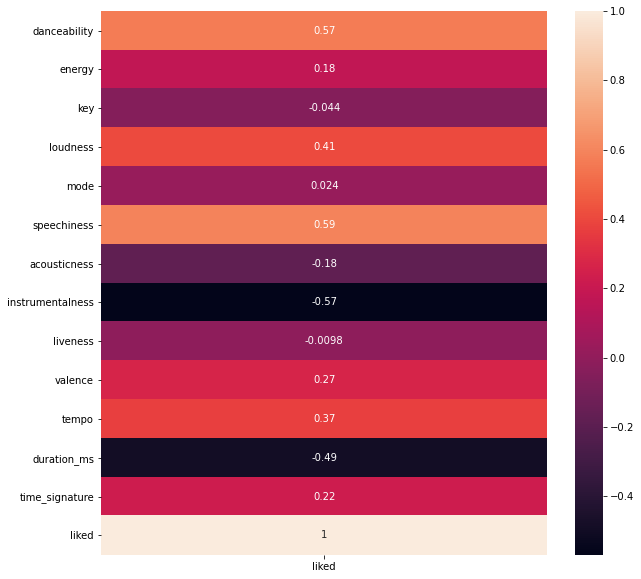

In [12]:
corr = data.corr()[["liked"]]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(
    corr, 
    annot=True,
    ax=ax
);

According to the figures , I'm very likely...
* To like ... songs :
    * danceable
    * high energy
    * loud
    * with many words
    * fast
    * with high amount of beats
    * slightly positive 
* To dislike ... songs :
    * not very accoustic
    * with low instrumentalness
    * short 

## 5. Modelling

For this , we're going to try several models:
* SVC with RBF kernel
* Random Forest Classifier
* KNN Classifier

### 5.1 Initial modelling

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , log_loss , roc_auc_score 

In [14]:
def evaluation(y_true,y_pred):
    return accuracy_score(y_true , y_pred) , log_loss(y_true , y_pred ) , roc_auc_score(y_true , y_pred)

In [15]:
X , y = data.drop("liked",axis=1) , data.liked
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
np.random.seed(42)

svc = SVC(kernel="rbf")
svc.fit(X_train,y_train)
y_svc_pred = svc.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_knn_pred = knn.predict(X_test)

In [17]:
class_svc , loss_svc , auc_svc = evaluation(y_test , y_svc_pred)
class_rf , loss_rf , auc_rf = evaluation(y_test ,y_rf_pred)
class_knn , loss_knn , auc_knn = evaluation(y_test , y_knn_pred)

In [18]:
scores = {
    "SVC":{
        "Accuracy":class_svc,
        "Loss":loss_svc,
        "AUC":auc_svc
    },
    "Random Forest":{
        "Accuracy":class_rf,
        "Loss":loss_rf,
        "AUC":auc_rf
    },
    "KNN":{
        "Accuracy":class_knn,
        "Loss":loss_knn,
        "AUC":auc_knn
    }
}
scores = pd.DataFrame(scores)
scores

,SVC,Random Forest,KNN
Accuracy,0.692308,0.897436,0.666667
Loss,10.627480,3.542459,11.513069
AUC,0.634286,0.904286,0.630000


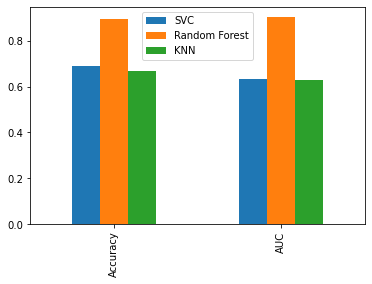

In [30]:
scores.drop("Loss").plot.bar();

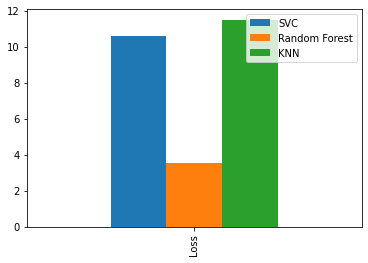

In [31]:
scores.drop(["Accuracy","AUC"]).plot.bar();

With such results , I'm not even going to try to hyperparameter tune the other models

## 5.2 Hyperparameter tuning

In [20]:
np.random.seed(42)

rf = RandomForestClassifier(n_jobs=-1)
rf_grid = {
 'max_depth': [10,25,50,100,None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1,3,5,7],
 'min_samples_split': [2,4,6,8],
 'n_estimators': [10,30,50,70,100,150,200,250,300,500,750,1000]
}
rf_cv = GridSearchCV(rf,rf_grid,verbose=2,cv=3)
rf_cv.fit(X_train , y_train)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; to

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=750; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, max_features=auto,

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=750; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=750; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=750; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=au

[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=750; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=750; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=750; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=aut

[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=750; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=750; total time=   0.3s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, 

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, mi

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, mi

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, mi

[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min

[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=auto, mi

[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min

[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=auto, mi

[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min

[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min

[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=auto, mi

[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=auto, mi

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_s

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, mi

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, mi

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, mi

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, mi

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, mi

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, mi

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=25, max_features=sqrt, mi

[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min

[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=auto, mi

[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=auto, mi

[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min

[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min

[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=auto, mi

[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min

[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=auto, mi

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, mi

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, mi

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, mi

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, mi

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, mi

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, mi

[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=

[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=

[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=

[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=

[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=

[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=100, max_features

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_f

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_f

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [10, 25, 50, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 30, 50, 70, 100, 150, 200, 250,
                                          300, 500, 750, 1000]},
             verbose=2)

In [21]:
rf_cv.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 30}

In [22]:
cv_pred = rf_cv.predict(X_test)

In [24]:
cv_acc , cv_loss , cv_auc = evaluation(y_test,cv_pred)
print(cv_acc , cv_loss , cv_auc)

0.9230769230769231 2.6568494559528792 0.9242857142857143


In [26]:
comp = {
    "Old":{
        "Accuracy":class_rf,
        "Loss":loss_rf,
        "AUC":auc_rf
    },
    "CV":{
        "Accuracy":cv_acc,
        "Loss":cv_loss,
        "AUC":cv_auc
    }
}
comp = pd.DataFrame(comp)
comp

,Old,CV
Accuracy,0.897436,0.923077
Loss,3.542459,2.656849
AUC,0.904286,0.924286


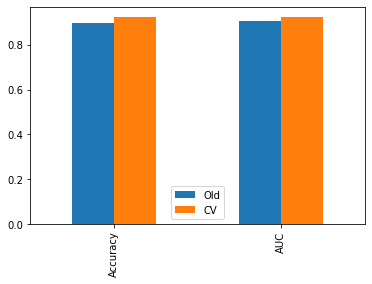

In [28]:
comp.drop("Loss").plot.bar();

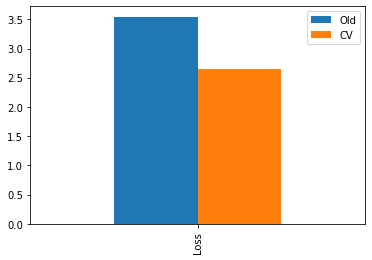

In [29]:
comp.drop(["Accuracy","AUC"]).plot.bar();

**Looks good ! Let's find the perfect tuning**

In [34]:
np.random.seed(42)

rf = RandomForestClassifier(n_jobs=-1)
rf_grid = {
 'max_depth': list(range(15,30)),
 'min_samples_leaf': [1,2],
 'min_samples_split': [3,4,5],
 'n_estimators': list(range(15,45))
}
rf_cv = GridSearchCV(rf,rf_grid,verbose=2,cv=3)
rf_cv.fit(X_train , y_train)

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=16; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=16; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=16; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=17; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=17; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=17; total time=   0.0s
[CV] END max_depth=15, min_samples_

[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=16; total time=   0.0s


[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=43; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=43; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=43; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=15; total time=   0.0s


[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=41; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=41; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=41; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=42; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=42; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=42; total time=   0.0s


[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=38; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=39; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=39; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=39; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=41; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=41; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=41; total time=   0.0s


[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=37; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=37; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=40; total time=   0.0s


[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=38; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=38; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=38; total time=   0.0s


[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=36; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=36; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=36; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=37; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=37; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=37; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=38; total time=   0.0s


[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=35; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=35; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=35; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=36; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=36; total time=   0.0s


[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=33; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=33; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=33; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s


[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=31; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=31; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=31; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=32; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=3, n_estimators=32; total time=   0.0s


[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=31; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=31; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=31; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=32; total time=   0.0s


[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=26; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=28; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=28; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=28; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=29; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=29; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=29; total time=   0.0s


[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=24; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=24; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=26; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=26; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=26; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=27; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=27; total time=   0.0s


[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=24; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=24; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=24; total time=   0.0s


[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=24; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=24; total time=   0.0s


[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=22; total time=   0.0s


[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s


[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=17; total time=   0.0s


[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=42; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=42; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=43; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=43; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=43; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s


[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s


[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s


[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=38; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=38; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=38; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s


[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=36; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=36; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=36; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=37; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=37; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=37; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=38; total time=   0.0s


[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=32; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=32; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=35; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=35; total time=   0.0s


[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=33; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=33; total time=   0.0s


[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=31; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=31; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=31; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=3, n_estimators=32; total time=   0.0s


[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=28; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=28; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=28; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.0s


[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=28; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=28; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=28; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=29; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=29; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=29; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.0s


[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=26; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=26; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=26; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=28; total time=   0.0s


[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=25; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=26; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=26; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=26; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=4, n_estimators=28; total time=   0.0s


[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=24; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=24; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=24; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=21; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=22; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=22; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=22; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=23; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=17; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=43; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=42; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=42; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=43; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=43; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=43; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s


[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=41; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s


[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s


[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=38; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=38; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=38; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s


[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=34; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=34; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=36; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=36; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=36; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=37; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=3, n_estimators=37; total time=   0.0s


[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=31; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=32; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=32; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=32; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=4, n_estimators=34; total time=   0.0s


[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=29; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=21, min_samples_leaf=2, min_samples_split=5, n_estimators=32; total time=   0.0s


[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=28; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=28; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=31; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=3, n_estimators=31; total time=   0.0s


[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=26; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=28; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=28; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=28; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=29; total time=   0.0s


[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=26; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=26; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=26; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=28; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=5, n_estimators=28; total time=   0.0s


[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=23; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=23; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=24; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=24; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=24; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=26; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=26; total time=   0.0s


[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=24; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=24; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=4, n_estimators=24; total time=   0.0s


[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=24; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=24; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=5, n_estimators=24; total time=   0.0s


[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=22; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=22; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=22; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=23; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=23; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=23; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=24; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=24; total time=   0.0s


[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=4, n_estimators=24; total time=   0.0s


[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=23; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=5, n_estimators=24; total time=   0.0s


[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s


[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s


[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=17; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=17; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=17; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=18; total time=   0.0s


[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=43; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=16; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=16; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=16; total time=   0.0s


[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=15; total time=   0.0s


[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=43; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=43; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=4, n_estimators=43; total time=   0.0s


[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=41; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=41; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=41; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=42; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=42; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=5, n_estimators=42; total time=   0.0s


[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=38; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=38; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=39; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=39; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=39; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=41; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=41; total time=   0.0s


[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=36; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=37; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=37; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=37; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=39; total time=   0.0s


[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=37; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=5, n_estimators=38; total time=   0.0s


[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=32; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=33; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=33; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=33; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=34; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=34; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=34; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=35; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=3, n_estimators=35; total time=   0.0s


[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=31; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=32; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=32; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=32; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=33; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=34; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=4, n_estimators=34; total time=   0.0s


[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=31; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=32; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=33; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=33; total time=   0.0s


[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=28; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=28; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=29; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=31; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=3, n_estimators=31; total time=   0.0s


[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=26; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=27; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=28; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=28; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=28; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=29; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=4, n_estimators=29; total time=   0.0s


[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=26; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=26; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=26; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=27; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=28; total time=   0.0s


[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=23; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=23; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=24; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=24; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=24; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=26; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=26; total time=   0.0s


[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=23; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=4, n_estimators=24; total time=   0.0s


[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s


[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=22; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=22; total time=   0.0s


[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=22; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=23; total time=   0.0s


[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=5, n_estimators=21; total time=   0.0s


[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=21; total time=   0.0s


[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s


[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s


[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=22; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=22; total time=   0.0s


[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s


[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=17; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s


[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=21; total time=   0.0s


[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=21; total time=   0.0s


[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=18; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=5, n_estimators=21; total time=   0.0s


[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=18; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=21; total time=   0.0s


[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=17; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=18; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.0s


[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=4, n_estimators=44; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=16; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=17; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=17; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=17; total time=   0.0s


[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=43; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=43; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=5, n_estimators=44; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=15; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=16; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=16; total time=   0.0s


[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=42; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=43; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=44; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=15; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=15; total time=   0.0s


[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=41; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=42; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=43; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=43; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=4, n_estimators=43; total time=   0.0s


[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=39; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=41; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=41; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=41; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=42; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=5, n_estimators=42; total time=   0.0s


[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=38; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=38; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=38; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=39; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=39; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=39; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=41; total time=   0.0s


[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=36; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=36; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=37; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=37; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=37; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=38; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=39; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=4, n_estimators=39; total time=   0.0s


[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=36; total time=   0.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=5, n_estimators=37; total time=   0.0s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                          24, 25, 26, 27, 28, 29, 30, 31, 32,
                                          33, 34, 35, 36, 37, 38, 39, 40, 41,
                                          42, 43, 44]},
             verbose=2)

In [35]:
rf_cv.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 42}

In [36]:
cv_pred = rf_cv.predict(X_test)

In [37]:
last_acc , last_loss , last_auc = evaluation(y_test,cv_pred)

In [38]:
comp = {
    "Old":{
        "Accuracy":class_rf,
        "Loss":loss_rf,
        "AUC":auc_rf
    },
    "CV":{
        "Accuracy":cv_acc,
        "Loss":cv_loss,
        "AUC":cv_auc
    },
    "Last":{
        "Accuracy":last_acc,
        "Loss":last_loss,
        "AUC":last_auc
    }
}
comp = pd.DataFrame(comp)
comp

,Old,CV,Last
Accuracy,0.897436,0.923077,0.923077
Loss,3.542459,2.656849,2.656849
AUC,0.904286,0.924286,0.924286


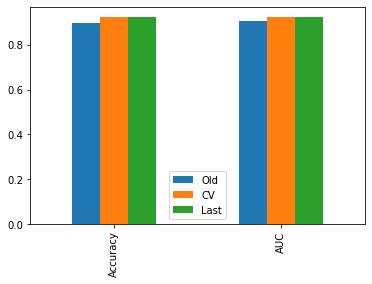

In [39]:
comp.drop("Loss").plot.bar();

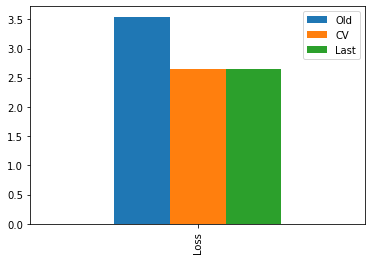

In [40]:
comp.drop(["Accuracy","AUC"]).plot.bar();

**Seems it doesn't improve anymore**

## 6. Testing on new data

We're going to :

* Make a model with all our data
* Save it
* Make a function to get the probabilities of liking just with the name of the song

In [1]:
# Reimporting libraries in case I just want to run this cell
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import os
import json
import urllib.parse

data = pd.read_csv("data/data.csv")
X , y = data.drop("liked",axis=1) , data.liked

try :
    model = pickle.load(open("model/model.sav", 'rb'))
except:
    model = RandomForestClassifier(n_jobs=-1,
                                  max_depth=15,
                                  min_samples_leaf=1,
                                  min_samples_split=4,
                                  n_estimators=42)

    model.fit(X,y)

    pickle.dump(model, open("model/model.sav", 'wb'))
try :
    with open("token.txt","r") as f:
        token = f.read()
        query = input("\n\n\nName of the track and artist ( be careful the database is somewhat capricious ) : ")

    query = urllib.parse.quote(query)
    stream = os.popen(f'curl -X "GET" "https://api.spotify.com/v1/search?q={query}&type=track" -H "Accept: application/json" -H "Content-Type: application/json" -H "Authorization: Bearer {token}"')
    data = stream.read()
    try :
        data = json.loads(data)["tracks"]["items"][0]
        song_id = data["id"]
        artist = data["artists"][0]["name"]
        title = data["name"]
        stream = os.popen(f'curl -X "GET" "https://api.spotify.com/v1/audio-features/{song_id}" -H "Accept: application/json" -H "Content-Type: application/json" -H "Authorization: Bearer {token}"')
        data = stream.read()
        data = json.loads(data)
        data = pd.DataFrame(data,index=[0])
        data.drop(["type","id","uri","track_href","analysis_url"],axis=1,inplace=True)
        print(f"\n\n\n\nThere is {list(model.predict_proba(data)[0])[1]*100:.2f}% chance that Brice likes \"{title}\" by {artist}\n\n\n")
    except KeyError:
        print("\n\n\nYour token has expired , create a new one : https://developer.spotify.com/console/get-several-tracks/\n\n\n")
    except IndexError:
        print("\n\n\nWe didn't find the song you were looking for\n\n\n")
except FileNotFoundError:
    print("""
          FileNotFoundError : There is no token file
          
          To create one , visit this page : https://developer.spotify.com/console/get-several-tracks/
          
          Log in to your spotify Account , and then copy what's in "OAuth Token" field 
          into a file called "token.txt" in the root directory of the project
          """)